In [2]:
%load_ext autoreload
%matplotlib inline

In [3]:
###### %autoreload 2

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys,os,glob
import pprint
import re

## Add own library to path
workdir = os.getcwd()
thismodule = sys.modules[__name__]
moduledir = os.path.join(os.path.dirname(workdir),'functions')
sys.path.insert(0,moduledir)
print("Own modules available:", [os.path.splitext(os.path.basename(x))[0]
                                 for x in glob.glob(os.path.join(moduledir,'*.py'))])

## Load own libraries
from thermoConstants import *
from setEnv import *

## Graphical parameters
plt.style.use(os.path.join(matplotlib.get_configdir(),'stylelib/presentation.mplstyle'))

Own modules available: ['thermoConstants', 'setEnv', 'importingData', 'statisticalDistributions', 'plot1DInvLog', 'dataFormat', 'savingResults', 'slicingAndSubsetting']


In [4]:
case = 'RCE'

In [9]:
modeldir = getModelDir()
sounding_file_0 = os.path.join(modeldir,case,'snd_template')
sounding_files = [sounding_file_0]
for SST in (300,302,304,306):
    sounding_files.append(os.path.join(modeldir,case,'snd_spunup_TKE-SST%d-r1'%SST))

In [16]:
f = []
for sounding_file in sounding_files:
    f.append(open(sounding_file))
# sounding_content = f[0].read()

In [17]:
sounding_all = []
for i in range(5):
    
    sounding_content = f[i].read()
    sounding_content = re.sub('[ ]+',' ',sounding_content)
    slice_lines = slice(2,66)
    sounding_varname = sounding_content.split('\n')[0].strip().split(' ')
    sounding_all.append(np.array([l.strip().split(' ') for l in  sounding_content.split('\n')[slice_lines]],dtype=float))


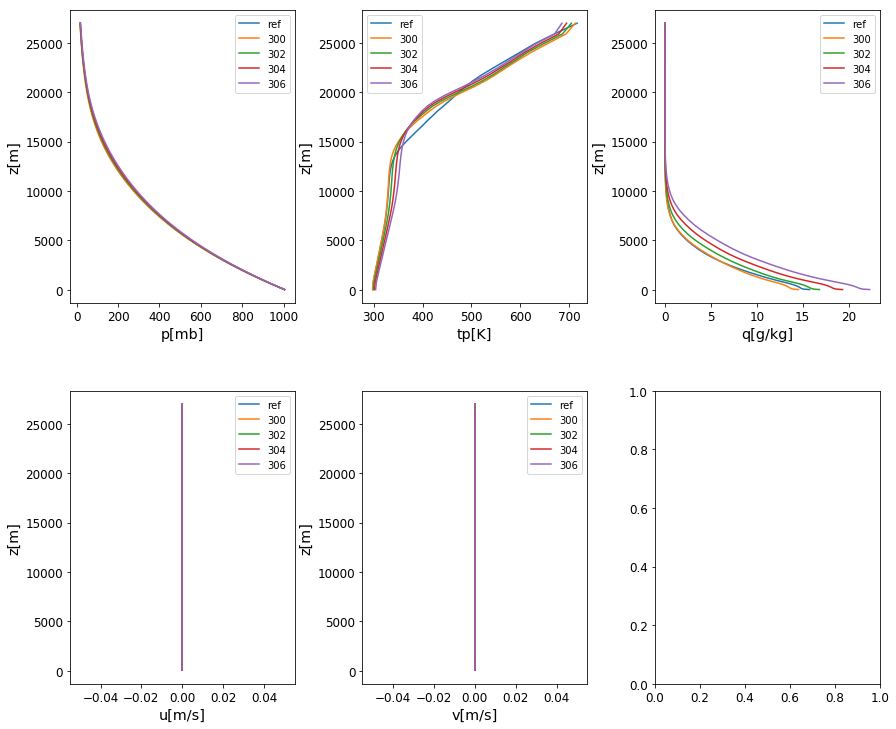

In [24]:
labs = ['ref','300','302','304','306']

fig, ax = plt.subplots(ncols=3,nrows=2,figsize=(15,12))
for j in range(1,6):
    ifig = np.unravel_index(j-1,(2,3))
    for i in range(5):
        ax[ifig].plot(sounding_all[i][:,j],sounding_all[i][:,0],label=labs[i])
    ax[ifig].set_xlabel(sounding_varname[j])
    ax[ifig].set_ylabel(sounding_varname[0])
    ax[ifig].legend()
plt.show()

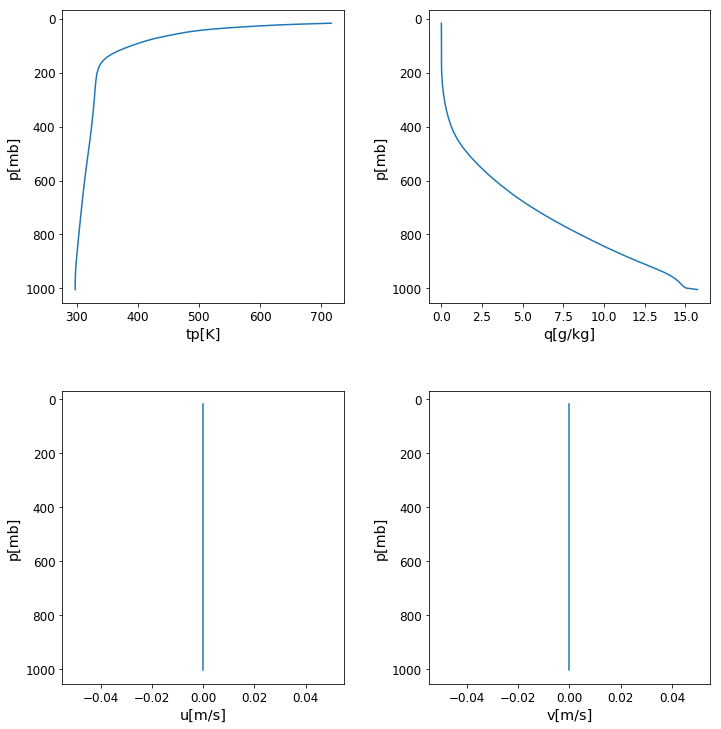

In [89]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(12,12))
for j in range(2,6):
    ifig = np.unravel_index(j-2,(2,2))
    ax[ifig].plot(sounding_all[:,j],sounding_all[:,1])
    ax[ifig].invert_yaxis()
    ax[ifig].set_xlabel(sounding_varname[j])
    ax[ifig].set_ylabel(sounding_varname[1])
plt.show()